In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [2]:
mask_path = sorted(glob('dataset/train_masks/*'))
len(mask_path)

2975

In [3]:
test_mask = tf.io.read_file(mask_path[1])
test_mask = tf.image.decode_image(test_mask, channels=1)
test_mask = np.squeeze(test_mask)

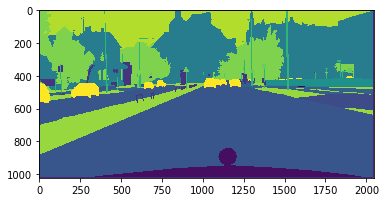

In [4]:
plt.imshow(test_mask)

In [5]:
class_labels = {
    'void': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
            10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23, 24, 25],
    'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]
}

In [6]:
def create_mask(m):
    mask_ = tf.io.read_file(m)
    mask_ = tf.image.decode_image(mask_, channels=1)
    mask_ = np.squeeze(mask_)
    mask = np.zeros((mask_.shape[0], mask_.shape[1], 2))
    for i in range(-1, 34):
        if i in class_labels['void']:
            mask[:, :, 0] = np.logical_or(mask[:, :, 0], (mask_==i))
        elif i in class_labels['vehicle']:
            mask[:, :, 1] = np.logical_or(mask[:, :, 1], (mask_==i))
    mask = np.argmax(mask, axis=-1)
    cv2.imwrite('dataset/2_channel_mask/'+m.split('/')[-1], mask)

In [7]:
for i in tqdm(mask_path):
    create_mask(i)

100%|██████████| 2975/2975 [12:42<00:00,  4.12it/s]


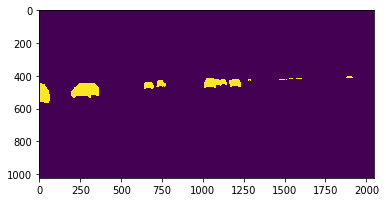

In [17]:
test = tf.io.read_file(sorted(glob('dataset/2_channel_mask/*'))[1])
test = tf.image.decode_image(test, channels=1)
test = np.squeeze(test)
plt.imshow(test)